# Data cleaning & preprocessing using titanic dataset

# 1.import necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2.load the dataset

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 3. initial data exploration

In [4]:
# View the first few rows of the datas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Summary statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 4. Handle Missing Values

In [7]:
# Check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Handle missing values
# Fill missing values in Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop the Cabin column (too many missing values)
df.drop('Cabin', axis=1, inplace=True)

# Fill missing values in Embarked with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Display the dataset after handling missing values
print("\nDataset after handling missing values:")
print(df.head())



Dataset after handling missing values:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S 

C:\Users\DIVYA\AppData\Local\Temp\ipykernel_16448\1776840357.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\DIVYA\AppData\Local\Temp\ipykernel_16448\1776840357.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

# 5.handle outliers

In [12]:
# Remove outliers
# Define a function to detect outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers in Age and Fare columns
df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Fare')

# Display the dataset after removing outliers
print("\nDataset after removing outliers:")
print(df.head())


Dataset after removing outliers:
   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    male  22.0      1      0   
2                        Heikkinen, Miss. Laina  female  26.0      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                      Allen, Mr. William Henry    male  35.0      0      0   
5                              Moran, Mr. James    male  28.0      0      0   

             Ticket     Fare Embarked  
0         A/5 21171   7.2500        S  
2  STON/O2. 3101282   7.9250        S  
3            113803  53.1000        S  
4            373450   8.0500        S  
5            330877   8.4583        Q  


5.1 Visualize outliers using boxplots

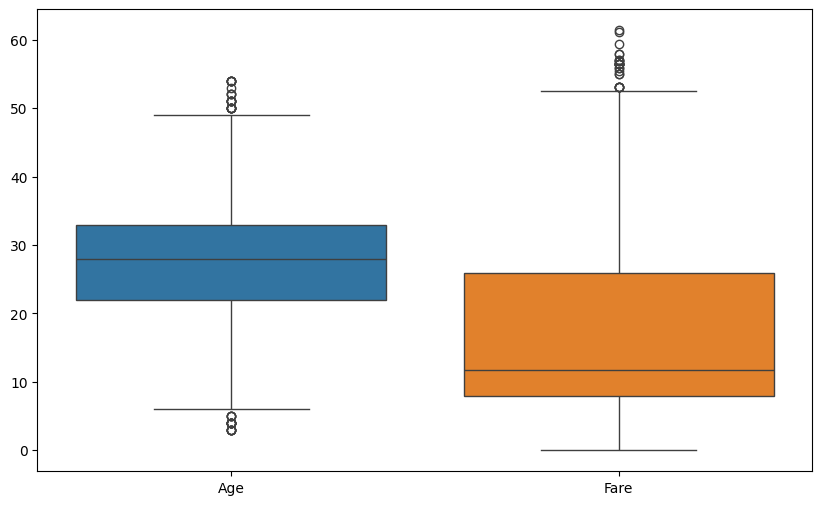

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Age', 'Fare']])
plt.show()

# 6.standardizing and formatting

In [21]:
from sklearn.preprocessing import StandardScaler
# Standardize numerical features (Age and Fare)
numerical_columns = ['Age', 'Fare']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Encode categorical variables (Sex, Embarked)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Display the final processed dataset
print("\nProcessed Dataset:")
print(df.head())


Processed Dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name       Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris -0.607611      1      0   
2                        Heikkinen, Miss. Laina -0.207827      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.691688      1      0   
4                      Allen, Mr. William Henry  0.691688      0      0   
5                              Moran, Mr. James -0.007934      0      0   

             Ticket      Fare  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171 -0.751265      True       False        True  
2  STON/O2. 3101282 -0.700265     False       False        True  
3            113803  2.712961     False       False        True  
4            373450 -0.690821      True       Fa

# 7. To check if your dataset is fully cleaned, you can perform a series of inspections and validations:

1. Check for Missing Values

In [22]:
print("Missing values in the dataset:\n", df.isnull().sum())

Missing values in the dataset:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64


2.Check for Outliers

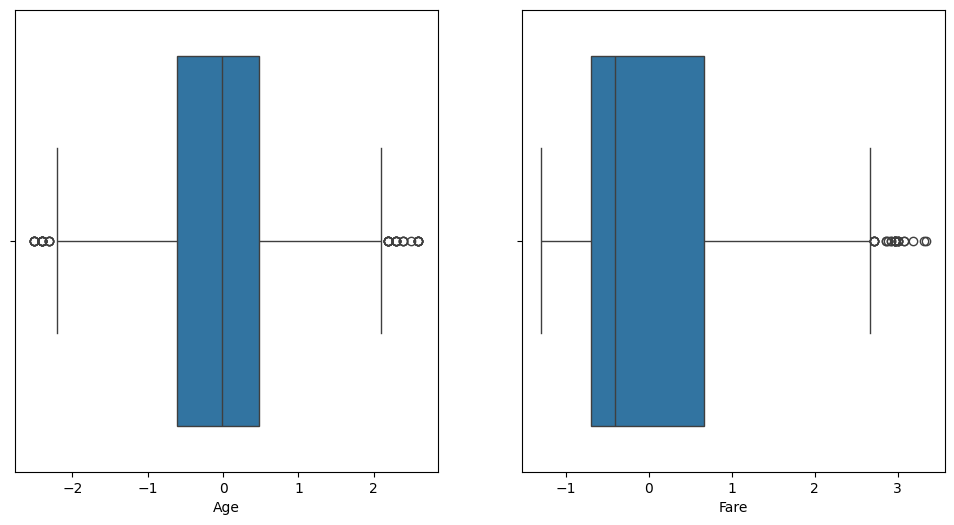

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots to check for outliers
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df, x='Age', ax=ax[0])
sns.boxplot(data=df, x='Fare', ax=ax[1])
plt.show()

3.Check Data Types

In [24]:
print("Data types in the dataset:\n", df.dtypes)

Data types in the dataset:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Sex_male          bool
Embarked_Q        bool
Embarked_S        bool
dtype: object


4.Check for Duplicates

In [25]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
if not duplicate_rows.empty:
    print("Duplicate rows:\n", duplicate_rows)

Number of duplicate rows: 0


5.Verify Encoding of Categorical Variables

In [27]:
print("Unique values in encoded columns:")
for column in ['Sex_male', 'Embarked_Q', 'Embarked_S']:
    print(f"{column}: {df[column].unique()}")

Unique values in encoded columns:
Sex_male: [ True False]
Embarked_Q: [False  True]
Embarked_S: [ True False]


6.Descriptive Statistics

In [28]:
print("Descriptive statistics of the dataset:\n", df.describe())

Descriptive statistics of the dataset:
        PassengerId    Survived      Pclass           Age       SibSp  \
count   718.000000  718.000000  718.000000  7.180000e+02  718.000000   
mean    447.883008    0.334262    2.512535  1.731824e-16    0.413649   
std     259.549777    0.472061    0.715818  1.000697e+00    0.855001   
min       1.000000    0.000000    1.000000 -2.506587e+00    0.000000   
25%     220.250000    0.000000    2.000000 -6.076110e-01    0.000000   
50%     447.500000    0.000000    3.000000 -7.934439e-03    0.000000   
75%     673.500000    1.000000    3.000000  4.793028e-01    1.000000   
max     891.000000    1.000000    3.000000  2.590664e+00    5.000000   

            Parch          Fare  
count  718.000000  7.180000e+02  
mean     0.317549 -8.906525e-17  
std      0.784792  1.000697e+00  
min      0.000000 -1.299043e+00  
25%      0.000000 -7.029415e-01  
50%      0.000000 -4.112647e-01  
75%      0.000000  6.599744e-01  
max      6.000000  3.338501e+00  


In [33]:
#Display first few rows of the cleaned dataset
print("\nFirst few rows of the cleaned dataset:")
print(df.head())


First few rows of the cleaned dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name       Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris -0.607611      1      0   
2                        Heikkinen, Miss. Laina -0.207827      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.691688      1      0   
4                      Allen, Mr. William Henry  0.691688      0      0   
5                              Moran, Mr. James -0.007934      0      0   

             Ticket      Fare  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171 -0.751265      True       False        True  
2  STON/O2. 3101282 -0.700265     False       False        True  
3            113803  2.712961     False       False        True  
4            373450 -0.69082

In [ ]:
# Example: Visualize survival rate by age
sns.histplot(x='Age', hue='Survived', data=df, kde=True)
plt.title('Survival by Age')
plt.show()